# Sklearn ile karar  ağacı algoritması geliştirme

Karar ağaçlarının nasıl çalıştığıyla ilgili kaynak: [Karar Agaclari Nasil Calisir](https://erdincuzun.com/makine_ogrenmesi/decision-tree-karar-agaci-id3-algoritmasi-classification-siniflama/) 

In [171]:
#Kütüphane tanımlamaları

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Elde ki veri kullanıcıların cinsiyeti, yaşı ve tahmini maaşına göre X ürünün satın aldığını ya da almadığını gösteriyor. 

In [172]:
#Verimizi dosya içerisinden çekip dataFrame haline getirme

dataFrame = pd.read_csv('Dataset\SosyalMedyaReklamKampanyası.csv')
dataFrame.index.name = 'ID'

dataFrame

,KullaniciID,Cinsiyet,Yas,TahminiMaas,SatinAldiMi
ID,,,,,
0,15624510,Erkek,19,19000,0
1,15810944,Erkek,35,20000,0
2,15668575,Kadın,26,43000,0
3,15603246,Kadın,27,57000,0
4,15804002,Erkek,19,76000,0
...,...,...,...,...,...
395,15691863,Kadın,46,41000,1
396,15706071,Erkek,51,23000,1
397,15654296,Kadın,50,20000,1


## Veri setini bağımlı ve bağımsız niteliklere ayırma

Kullanıcı ID ve Cinsiyet sütunlarından kurtulucaz. Bağımsız değişken olarak yaş ve tahmini maaşı kullanıcaz.

In [175]:
# Değişkenlerimiz, öz niteliklerimiz, Features
x = dataFrame.iloc[:, [2,3]].values

#Maaş kolonu
y = dataFrame.iloc[:, 4].values


## Veri setini test ve train data olucak şekilde ayırdık.

*x_train* ve *y_train* ile modelimizi eğitiriz. Eğittiğimiz modeli *x_test* datası ile çalıştırarak tahminde bulunmasını sağlıcaz. Elde ettiğimiz tahmin datalarını **y_test** yani gerçek data ile kıyaslayarak modelimizin başarı oranını bulucaz 

In [176]:
#Veriyi test ve train data olacak şekilde ayırdık

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state= 0)

## Normalizasyon işlemi

Normalizasyon, verileri farklı ölçeklerde olduğu durumlarda, hepsini aynı ölçekte ifade ederek, 
daha etkili bir şekilde karşılaştırılmasını ve modellemesini sağlar. 
Özellikle makine öğrenmesi ve veri analizi gibi alanlarda veri ön işleme adımı olarak yaygın olarak kullanılır.

Örneğin:
Düşün birbirinden farklı özelliklere sahip oyuncak arabaların hızlarını ölçtüğünü ve hızları mil/saat cinsinden ifade ettiğini. Ancak bazı arabaların hızları daha büyük sayılar, bazıları ise daha küçük sayılar olabilir. Normalizasyon, bu hızları 0 ile 1 arasında olacak şekilde dönüştürmeye yardımcı olur. Böylece tüm hızlar aynı ölçekte olur ve daha kolay karşılaştırılabilirler. Yani, hızı 0.5 olan arabayı, hızı 0.1 olan arabaya göre daha hızlı anlarız.

In [177]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

## Karar agaci modelimizi olusturma ve eğitme (Model 1)

criterion = 'entropy' ifadesi, DecisionTreeClassifier'ın algoritmasının hangi kriteri kullanarak ağacın dallarını bölmesi gerektiğini belirtir. Decision Tree algoritması, veri noktalarını karar düğümlerine bölmek için farklı kriterleri kullanabilir ve 'entropy' burada kullanılan bir kriterdir.

Entropi, bilgi teorisi kavramlarından biridir ve bir veri kümesindeki düzensizliği veya belirsizliği ölçer. Bir düğümdeki verilerin homojen olduğu durumda (örneğin, sadece tek bir sınıfa ait veri noktaları varsa), entropi düşüktür. Ancak, veriler farklı sınıflara aitse, entropi yüksek olur ve düğüm daha düzensiz hale gelir.

In [178]:
# Karar ağacı modelini oluşturmak ve eğitmek
# Budama yapmadığımız için overfitting bir model oluşturduk

from sklearn.tree import DecisionTreeClassifier


model1 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Model Tahminleri

In [179]:
# tahminde bulunma
# overfitting olduğu için tahminlerde yanlışlık var

tahminDegerleri = model1.predict(x_test) #Test verileri ile tahminde bulundurttuk

tahminVeGercek = pd.DataFrame(y_test, columns= ["Gercek Deger"])
tahminVeGercek["Tahmin Degerleri"] = tahminDegerleri

tahminVeGercek.head(17)

,Gercek Deger,Tahmin Degerleri
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,1


In [180]:
# Hata matrisi olusturma
# [61  7] ifadesi 61 doğru tahmin 7 yanlış tahminimiz olduğu anlamına gelir

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, tahminDegerleri)
print(cm)

[[61  7]
 [ 3 29]]


In [181]:
#Modelin test ve train başarıları

print(f"Train dataları ile modelin basari oranı:",model1.score(x_train,y_train))
print(f"Test dataları ile modelin basari oranı:",model1.score(x_test,y_test))

Train dataları ile modelin basari oranı: 1.0
Test dataları ile modelin basari oranı: 0.9


# Modeli genelleştirme

Karar ağacı algoritmaları doğaları gereği train data ile kesin bir uyum içerisinde olurlar. Yani train datayı tamamen ezberlerler. Bu ezber sonucu yüzünden test dataları ile tahminde bulunduğumuz zaman, modelin yanlış tahminde bulunma olasılığı artar. Bu olaya overfitting denir.

Overfitting'i engellemek için ağaç budaması yapabiliriz. 2 çeşit budama vardır bunlardan bir tane pre-pruning(erken budama) diğeri ise post-pruning(geç budama) yapmaktır.

***Pre-Pruning:*** Bir düğüme ulaşan örnek datanın sayısı ilk baştaki datanın belirli bir oranının altına düştüyse düğüm daha fazla bölünmez. Train hatası fazlalaşır fakat test hatası azalır.

Örnek: İlk başta 100 data varsa gelinen düğümde data sayını ilk baştaki data sayısının örneğin %10'nu kadar yada daha azsa ve homojen değilse (*7 evet* , *3 hayır* gibi). Çoğunluk olan datayı yaprak yap *(evet)*.

***Post-Pruning:*** Birden fazla ağaç oluşturur. Sonrasında bu ağaçlar üzerinde kırpma işlemleri yapar. Her ağaç için train datayı dener ve doğruluk oranı alarak en iyi ağaç modelini oluşturur.


-----------------------------------------------------------

## Pre-pruning (Model 2)

**max_depth** parametresi ile oluşucak karar ağacının derinliğini sınırladık. Yani oluşan karar ağacı maksimum 4 düğüm(katman) içerebilicek

In [182]:
model2 = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=4)
model2.fit(x_train,y_train) #Modeli eğitme

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

### Model tahminleri

In [183]:
tahminDegerleri = model2.predict(x_test)

tahminVeGercek = pd.DataFrame(y_test, columns= ["Gercek Deger"])
tahminVeGercek["Tahmin Degerleri"] = tahminDegerleri

tahminVeGercek.head(17)

,Gercek Deger,Tahmin Degerleri
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,1


In [184]:
# Hata matrisi olusturma
# [61  4] ifadesi 64 doğru tahmin ve 4 yanlış tahminimiz olduğu anlamına gelir

cm = confusion_matrix(y_test, tahminDegerleri)
print(cm)

[[64  4]
 [ 3 29]]


In [185]:
print(f"Train dataları ile modelin basari oranı:",model2.score(x_train,y_train))
print(f"Test dataları ile modelin basari oranı:",model2.score(x_test,y_test))

#Görüldüğü üzere train datanın başarısı düşmüş fakat test datanın başarısı artmıştır.

Train dataları ile modelin basari oranı: 0.9166666666666666
Test dataları ile modelin basari oranı: 0.93


## Post-pruning (Model 3)

Maliyet karmaşıklık yolu hesabını kullanıcaz:

Maliyet-karmaşıklık yolu, karar ağacının budama düzeylerini temsil eden 
farklı alfa (α) değerlerini içerir. Bu alfa değerleri, ağacın dallarının 
kesilme düzeyini kontrol eder. Daha yüksek alfa değerleri, daha fazla 
budamanın yapılmasına ve daha basit bir modelin elde edilmesine yol açar.

In [186]:
# x_train ve y_train değerlerimiz hazır olduğu için sadece modeli kurucaz

model3 = DecisionTreeClassifier(random_state=0) #Model oluşturma


#Bu satırda oluşturulan modelin maliyet-karmaşıklık yolu bulunmaya çalışılır.
path = model3.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, karmasiklik = path.ccp_alphas, path.impurities

In [187]:
"""
Her alpha değerini kullanarak farklı bir karar ağacı oluşturuyoruz.
Alpha değeri karar ağacının budanma düzeyini gösterir. Oluşturduğumuz karar
ağaçlarını eğitip sonrasında bir listeye ekliyoruz.
"""

modeller = []

#Karar ağac
for ccp_alpha in ccp_alphas:
    model3 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model3.fit(x_train,y_train)
    modeller.append(model3)
    

In [188]:
modeller = modeller[:-1]
ccp_alphas = ccp_alphas[:-1]

### Oluşan ağaçların düğüm sayısını ve karmaşıklığını görselleştirme

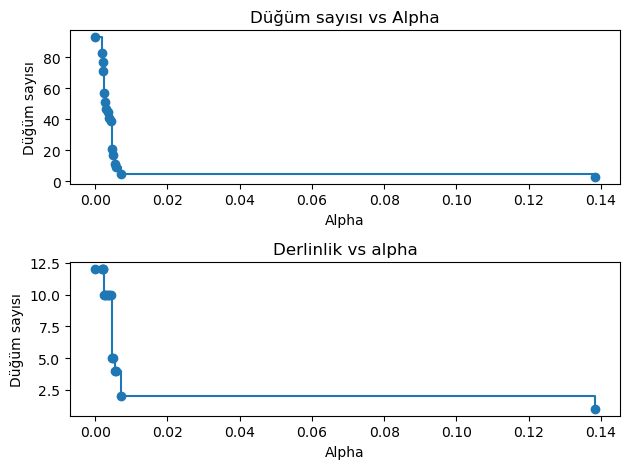

In [189]:
node_sayaci = [model.tree_.node_count for model in modeller]
derinlik = [model.tree_.max_depth for model in modeller]

fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_sayaci, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Düğüm sayısı")
ax[0].set_title("Düğüm sayısı vs Alpha")

ax[1].plot(ccp_alphas, derinlik, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Düğüm sayısı")
ax[1].set_title("Derlinlik vs alpha")
fig.tight_layout()

### Eğitim ve test setleri için doğruluk ve alfa karşılaştırması

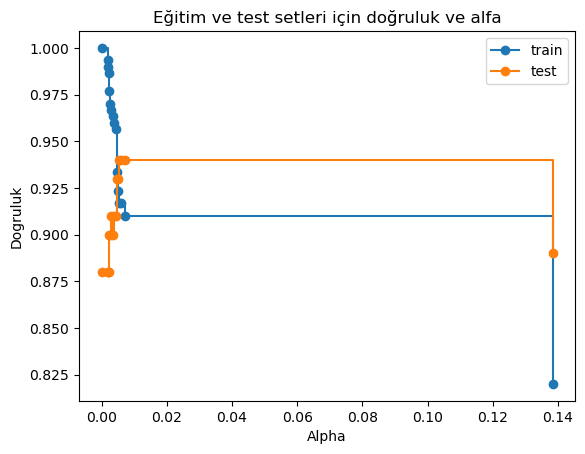

In [190]:
train_scores = [model.score(x_train, y_train) for model in modeller]
test_scores = [model.score(x_test, y_test) for model in modeller]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Dogruluk")
ax.set_title("Eğitim ve test setleri için doğruluk ve alfa")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Dogruluk degeri ve index numarası

Yukarıda her alpha değeri için bir ağaç oluşturup sonrasında bu ağaçları eğitmiş ve eğittiğimiz ağaçları bir liste içerisine atmıştık. Ağaçların  Alpha değerleri ve doğruluk grafiklerini, alpha değeri ve düğüm sayısı vb. görselleştirmelerini yaptı. Bu kısımda ise hangi indexte ki ağacın doğruluk oranı daha fazla onun görselleştirmesini yaptık.

Text(0.5, 1.0, 'Dogruluk Degeri ve Index No')

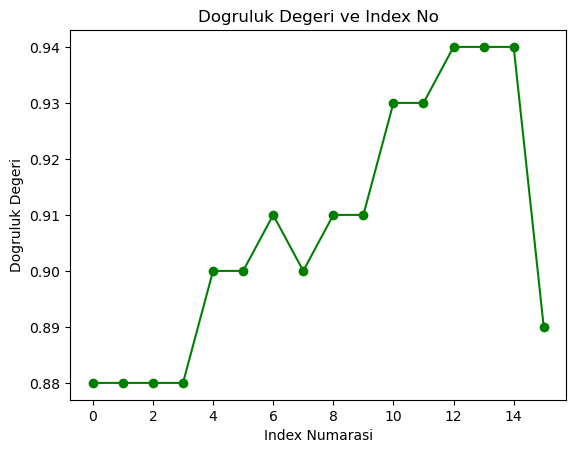

In [191]:
x = list(zip(ccp_alphas,test_scores))


plt.plot([i for i in range(len(x))], [deger[1] for deger in x], marker = "o", color = "g")
plt.xlabel("Index Numarasi")
plt.ylabel("Dogruluk Degeri")
plt.title("Dogruluk Degeri ve Index No")

### Model tahminleri

Yukarıda ki grafikten 12, 13 ve 14. indexte ki ağaçların en yüksek doğruluk değerlerini verdiğini görüyoruz. 12. indexte ki ağacı yeni model olarak aldık ve tahminlerde bulundurttuk.

In [192]:
yeniModel = clfs[12]

tahminDegerleri = yeniModel.predict(x_test)

tahminVeGercek = pd.DataFrame(y_test, columns= ["Gercek Deger"])
tahminVeGercek["Tahmin Degerleri"] = tahminDegerleri

tahminVeGercek.head(17)

,Gercek Deger,Tahmin Degerleri
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,1


In [193]:
# Hata matrisi olusturma
# [61  4] ifadesi 64 doğru tahmin ve 4 yanlış tahminimiz olduğu anlamına gelir

cm = confusion_matrix(y_test, tahminDegerleri)
print(cm)

[[64  4]
 [ 2 30]]


In [194]:
print(f"Train dataları ile modelin basari oranı:",yeniModel.score(x_train,y_train))
print(f"Test dataları ile modelin basari oranı:",yeniModel.score(x_test,y_test))

#Görüldüğü üzere train datanın başarısı düşmüş fakat test datanın başarısı artmıştır.

Train dataları ile modelin basari oranı: 0.9166666666666666
Test dataları ile modelin basari oranı: 0.94


# Oluşturulan 3 modelinde doğruluk oranları

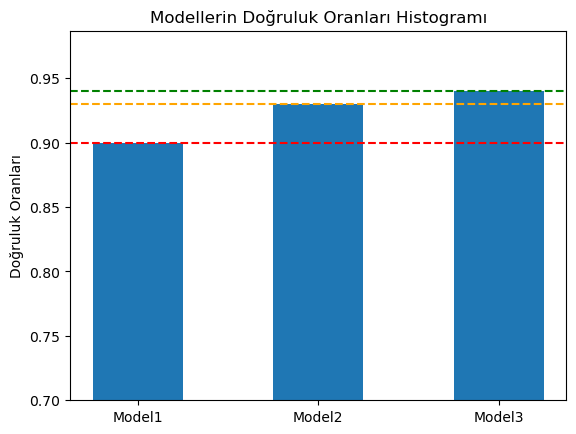

In [195]:
modellerinDogrulukOranlari = [model1.score(x_test,y_test),model2.score(x_test,y_test),yeniModel.score(x_test,y_test)]

plt.bar(["Model1","Model2","Model3"],modellerinDogrulukOranlari, width=0.5)
plt.ylabel('Doğruluk Oranları')
plt.title('Modellerin Doğruluk Oranları Histogramı')
plt.axhline(y=modellerinDogrulukOranlari[0], color='red', linestyle='--', label='Model1 Doğruluk Oranı')
plt.axhline(y=modellerinDogrulukOranlari[1], color='orange', linestyle='--', label='Model2 Doğruluk Oranı')
plt.axhline(y=modellerinDogrulukOranlari[2], color='green', linestyle='--', label='Model3 Doğruluk Oranı')
plt.yticks(np.arange(0,1,0.05))
plt.ylim(bottom=0.7)
plt.show()